## Statistics - Homework 3
**Martin Kosík**

First, we import the necessary packages

In [1]:
import numpy as np
from scipy import optimize
import math
import pandas as pd
import matplotlib.pyplot as plt

Next, we define the true location and scale parameters and draw 10,000 from the given logistic distribution

In [2]:
np.random.seed(1234) # sets the seed so that the results could be replicated
loc, scale, N = 10, 4, 10000
X = np.random.logistic(loc, scale, N)

We define the negative likelihood function

In [3]:
def neg_log_likelihood(params):
    return -(-N*math.log(params[1]) + sum(-(X-params[0])/params[1]) - 2 * sum(np.log(1 + np.exp(-(X-params[0])/params[1]))))

Set the bounds and intial guess for the numrical optimization methods

In [4]:
bounds = [(-20, 20), (1, 10)]
X_0 = [5, 3]

Plot the negative log-likelihood function for given values to visually check its behavior

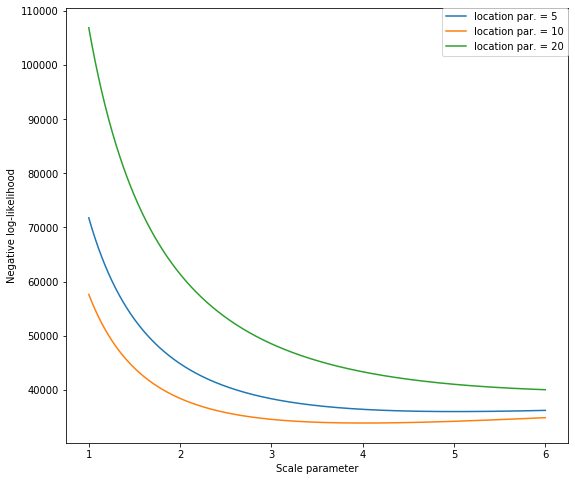

In [5]:
scale_grid = np.linspace(1,6,1000)

n_ll = np.zeros((1000,3))

for i in range(1000):
    n_ll[i, ] = [neg_log_likelihood([5, scale_grid[i]]), 
                 neg_log_likelihood([10, scale_grid[i]]),
                 neg_log_likelihood([20, scale_grid[i]])]

    
plt.figure(figsize=(9, 8))
plt.plot(scale_grid, n_ll[:,0], label = "location par. = 5")
plt.plot(scale_grid, n_ll[:,1], label = "location par. = 10")
plt.plot(scale_grid, n_ll[:,2], label = "location par. = 20")
plt.ylabel('Negative log-likelihood')
plt.xlabel('Scale parameter')
plt.legend(loc='upper right', borderaxespad=0.)
plt.show()


Apply the various optimization methods and save the results

In [6]:
results = dict()
results['DA'] = optimize.dual_annealing(neg_log_likelihood, bounds)
results['Nelder_Mead'] = optimize.minimize(neg_log_likelihood, X_0, method='Nelder-Mead', options={'xatol': 1e-7})
results['shgo'] = optimize.shgo(neg_log_likelihood, bounds)

Put the final results into table and print them

In [7]:
loc_estimates = list()
scale_estimates = list()

opt_methods = ['Dual annealing', 'Nelder–Mead method', 'SHGO']

for key in results.keys():
    loc_estimates.append(results[key]["x"][0])
    scale_estimates.append(results[key]["x"][1])


results_df = pd.DataFrame(list(zip(opt_methods, loc_estimates, scale_estimates)), 
                          columns = ["optimization_method", "location_parameter", "scale_parameter"]) 


In [8]:
results_df

,optimization_method,location_parameter,scale_parameter
0,Dual annealing,10.001864,4.014189
1,Nelder–Mead method,10.001927,4.014204
2,SHGO,9.995458,5.500000


We see that all methods got very close to the true values of the parameters (except the simplicial homology global optimisation (SHGO) method which likely got stuck in a local minimum). 